In [8]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
train_data = pd.read_csv("./archive/fashion-mnist_train.csv")
test_data = pd.read_csv("./archive/fashion-mnist_test.csv")

In [3]:
# Separate features and labels
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

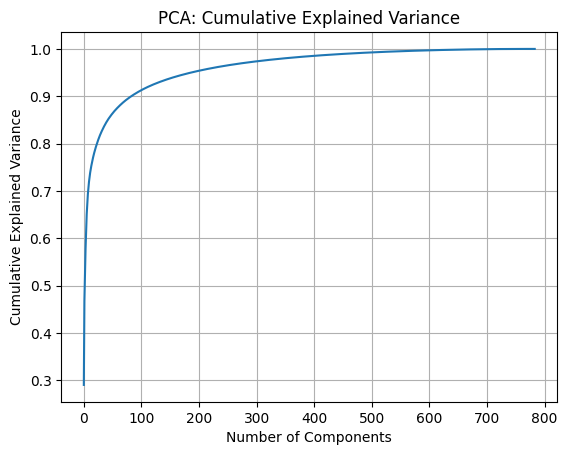

Optimal Number of Components: 187


In [4]:
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_train)

# Fit PCA to the standardized data
pca = PCA()
pca.fit(X_train)

# Plot the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Determine the optimal number of components
optimal_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # Choose a threshold (e.g., 95%)
print(f"Optimal Number of Components: {optimal_components}")

In [5]:
# Apply PCA
pca = PCA(n_components=optimal_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [6]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf'],
               'gamma': ['scale', 'auto']}
svc = SVC(probability=True)

grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_
print("Best parameters:", grid_search.best_params_)
best_svc = grid_search.best_estimator_

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


ValueError: Found input variables with inconsistent numbers of samples: [10000, 60000]

In [7]:
# Accuracy Evaluation
y_train_pred = best_svc.predict(X_train_pca)
y_test_pred = best_svc.predict(X_test_pca)
svc_train = metrics.accuracy_score(y_train, y_train_pred)
svc_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Train Accuracy score: {}".format(svc_train))
print("Validation Accuracy score: {}".format(svc_accuracy))
print(metrics.classification_report(y_train, y_train_pred))

Train Accuracy score: 0.9706666666666667
Validation Accuracy score: 0.9104
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6000
           1       1.00      1.00      1.00      6000
           2       0.95      0.95      0.95      6000
           3       0.96      0.98      0.97      6000
           4       0.94      0.95      0.94      6000
           5       1.00      0.99      1.00      6000
           6       0.94      0.90      0.92      6000
           7       0.98      0.99      0.99      6000
           8       1.00      1.00      1.00      6000
           9       0.99      0.99      0.99      6000

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf'],
               'gamma': ['scale', 'auto']}
svc = SVC(probability=True)

grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_
print("Best parameters:", grid_search.best_params_)
best_svc = grid_search.best_estimator_

# Accuracy Evaluation
y_train_pred = best_svc.predict(X_train_pca)
y_test_pred = best_svc.predict(X_test_pca)
svc_train = metrics.accuracy_score(y_train, y_train_pred)
svc_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Train Accuracy score: {}".format(svc_train))
print("Validation Accuracy score: {}".format(svc_accuracy))
print(metrics.classification_report(y_train, y_train_pred))